In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.tools as tls
import time
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap

In [377]:
glt_df=pd.read_csv('worldterrorattack.csv',encoding='ISO-8859-1',low_memory=False)

In [352]:
glt_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'state','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type'},inplace=True)

In [353]:
glt_df=glt_df[['Year','Month','Day','Country','Region','city','state','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type']]
glt_df['casualities']=glt_df['Killed']+glt_df['Wounded']
glt_df.head(170350)

,Year,Month,Day,Country,Region,city,state,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,1.0
1,1970,0,0,Mexico,North America,Mexico city,NaN,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Tarlac,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,1.0
3,1970,1,0,Greece,Western Europe,Athens,Attica,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),NaN
4,1970,1,0,Japan,East Asia,Fukouka,NaN,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),NaN
5,1970,1,1,United States,North America,Cairo,Illinois,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,0.0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,0.0
7,1970,1,2,United States,North America,Oakland,California,37.805065,-122.273024,Bombing/Explosion,0.0,0.0,Edes Substation,Unknown,Utilities,0.0
8,1970,1,2,United States,North America,Madison,Wisconsin,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,0.0
9,1970,1,3,United States,North America,Madison,Wisconsin,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),0.0


In [354]:
glt_df.shape

(170350, 16)

In [355]:
glt_df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city             446
state          14502
latitude        4606
longitude       4606
AttackType         0
Killed          9682
Wounded        15325
Target           634
Group              0
Target_type        0
casualities    15826
dtype: int64

In [356]:
print('Highest Terrorist Attacked Country:',glt_df['Country'].value_counts().index[0])
print('Highest Terrorist Attacked Regions:',glt_df['Region'].value_counts().index[0])
print('Highest number of death in an attack are:',glt_df['Killed'].max(),'that took place in',glt_df.loc[glt_df['Killed'].idxmax()].Country)

Highest Terrorist Attacked Country: Iraq
Highest Terrorist Attacked Regions: Middle East & North Africa
Highest number of death in an attack are: 1500.0 that took place in Iraq


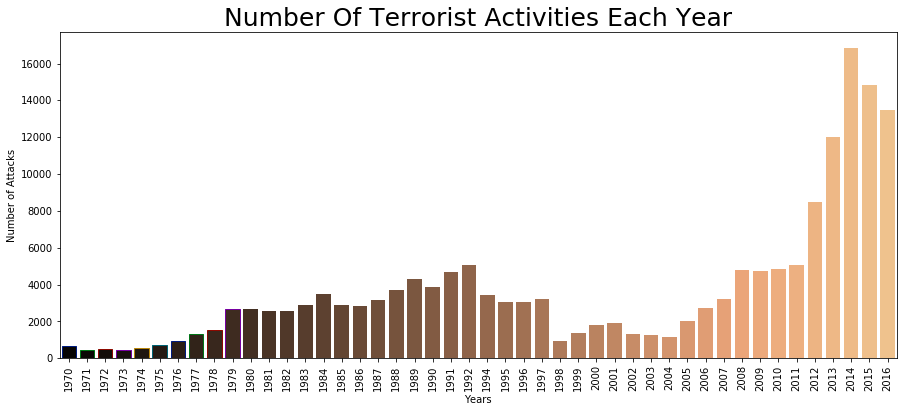

In [357]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=glt_df,palette='copper',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year', size=25)
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

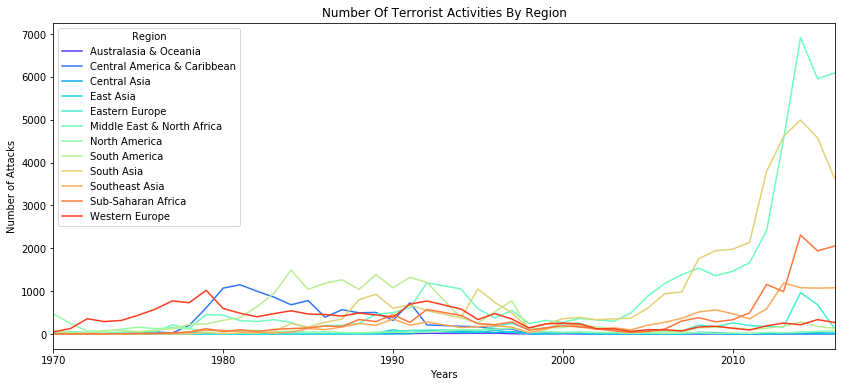

In [372]:
glt_region=pd.crosstab(glt_df.Year,glt_df.Region)
glt_region.plot(color=sns.color_palette('rainbow',12))
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.title('Number Of Terrorist Activities By Region')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

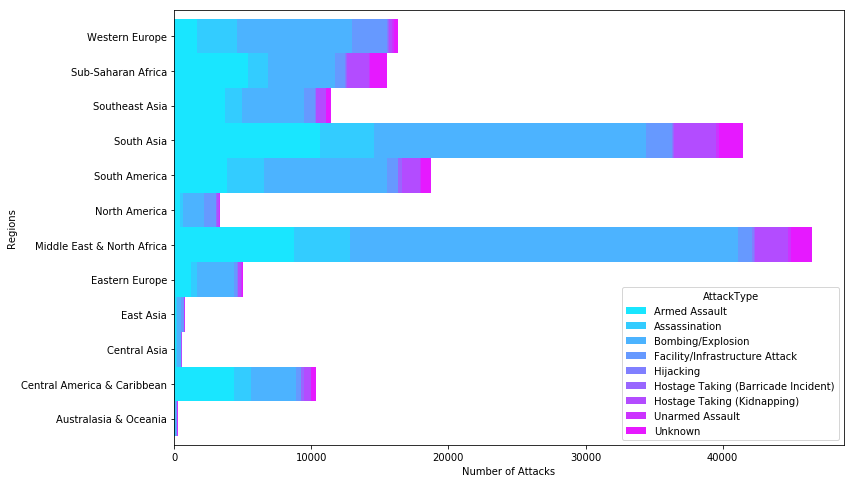

In [373]:
pd.crosstab(glt_df.Region,glt_df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('cool',9))
fig=plt.gcf()
plt.ylabel('Regions')
plt.xlabel('Number of Attacks')
fig.set_size_inches(12,8)
plt.show()

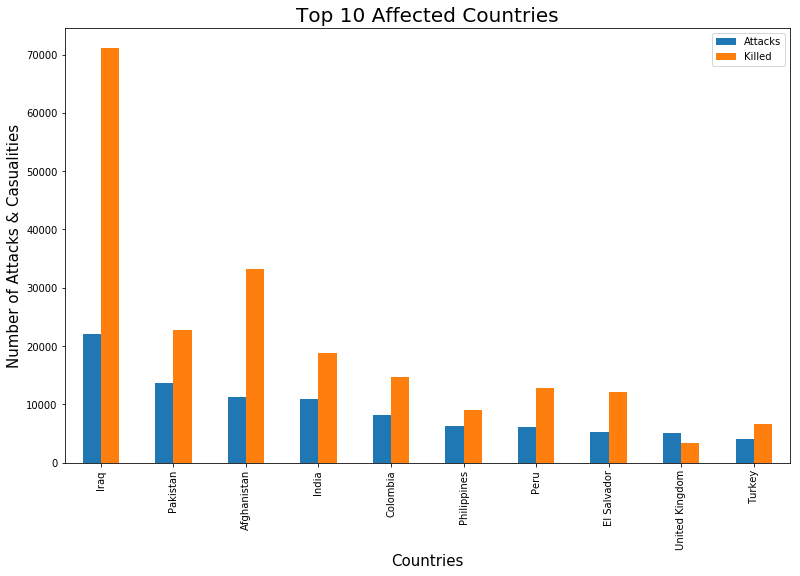

In [374]:
coun_glt=glt_df['Country'].value_counts()[:10].to_frame()
coun_glt.columns=['Attacks']
glt_kill=glt_df.groupby('Country')['Killed'].sum().to_frame()
coun_glt.merge(glt_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.50)
fig=plt.gcf()
plt.title('Top 10 Affected Countries',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Number of Attacks & Casualities',size=15)
fig.set_size_inches(13,8)
plt.show()

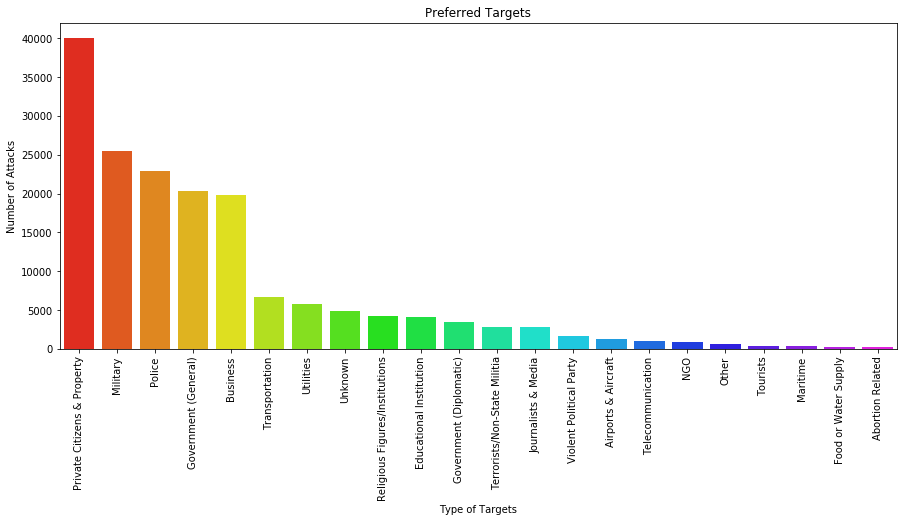

In [375]:
plt.subplots(figsize=(15,6))
sns.countplot(glt_df['Target_type'],palette='gist_rainbow',order=glt_df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Preferred Targets')
plt.xlabel('Type of Targets')
plt.ylabel('Number of Attacks')
plt.show()

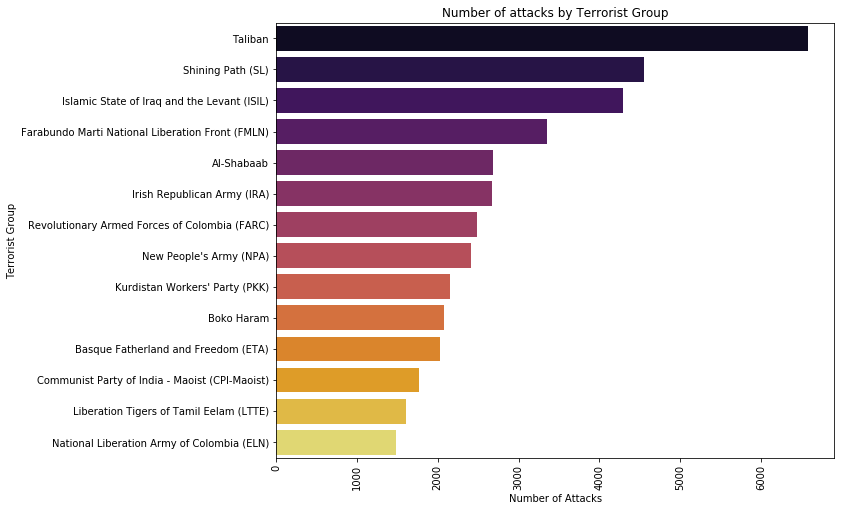

In [363]:
sns.barplot(glt_df['Group'].value_counts()[1:15].values,glt_df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Number of attacks by Terrorist Group')
plt.ylabel('Terrorist Group')
plt.xlabel('Number of Attacks')
plt.show()

In [364]:
glt_df=glt_df[['Year','Month','Day','Country','Region','city','state','latitude','longitude','AttackType','Group','Target_type']]
glt_usa = glt_df[glt_df['Country']=='United States']
glt_usa[glt_usa.isnull().any(axis = 1)]
glt_usa = glt_usa.dropna(axis = 0)
glt_usa_state = pd.DataFrame({'State':glt_usa['state'].value_counts().index, 'Counts':glt_usa['state'].value_counts().values})

In [365]:
states_dict = {
         'Alaska':'AK',
         'Alabama':'AL',
         'Arkansas':'AR',
         'Arizona':'AZ',
         'California':'CA',
         'Colorado':'CO',
         'Connecticut':'CT',
         'District of Columbia':'DC',
         'Delaware':'DE',
         'Florida':'FL',
         'Georgia':'GA',
         'Hawaii':'HI',
         'Iowa':'IA',
         'Idaho':'ID',
         'Illinois':'IL',
         'Indiana':'IN',
         'Kansas':'KS',
         'Kentucky':'KY',
         'Louisiana':'LA',
         'Massachusetts':'MA',
         'Maryland':'MD',
         'Maine':'ME',
         'Michigan':'MI',
         'Minnesota':'MN',
         'Missouri':'MO',
         'Mississippi':'MS',
         'Montana':'MT',
         'North Carolina':'NC',
         'North Dakota':'ND',
         'Nebraska':'NE',
         'New Hampshire':'NH',
         'New Jersey':'NJ',
         'New Mexico':'NM',
         'Nevada':'NV',
         'New York':'NY',
         'Ohio':'OH',
         'Oklahoma':'OK',
         'Oregon':'OR',
         'Pennsylvania':'PA',
         'Puerto Rico':'PR',
         'Rhode Island':'RI',
         'South Carolina':'SC',
         'South Dakota':'SD',
         'Tennessee':'TN',
         'Texas':'TX',
         'Utah':'UT',
         'Virginia':'VA',
         'Vermont':'VT',
         'Washington':'WA',
         'Wisconsin':'WI',
         'West Virginia':'WV',
         'Wyoming':'WY'
};

In [366]:
glt_usa_state['State'].replace(states_dict,inplace = True);

In [376]:
init_notebook_mode()
scale ='Reds'
data = [ dict(
        type = 'choropleth',
        colorscale = scale,
        autocolorscale = False,
        showscale = False,
        locations = glt_usa_state['State'],
        z = glt_usa_state['Counts'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255, 255, 255)',
                width = 2
            ) ),
        ) ]
layout = dict(
        title = 'Terrorism in United States (1970-2016)',
        geo = dict(
            scope = 'usa',
            projection = dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
            countrycolor = 'rgb(255, 255, 255)')        
             )
 
figure = dict(data=data, layout=layout)
iplot(figure)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [367]:
glt_df=pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1',low_memory=False)

/Users/lokeshwar/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning:

invalid value encountered in greater_equal

/Users/lokeshwar/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/lokeshwar/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



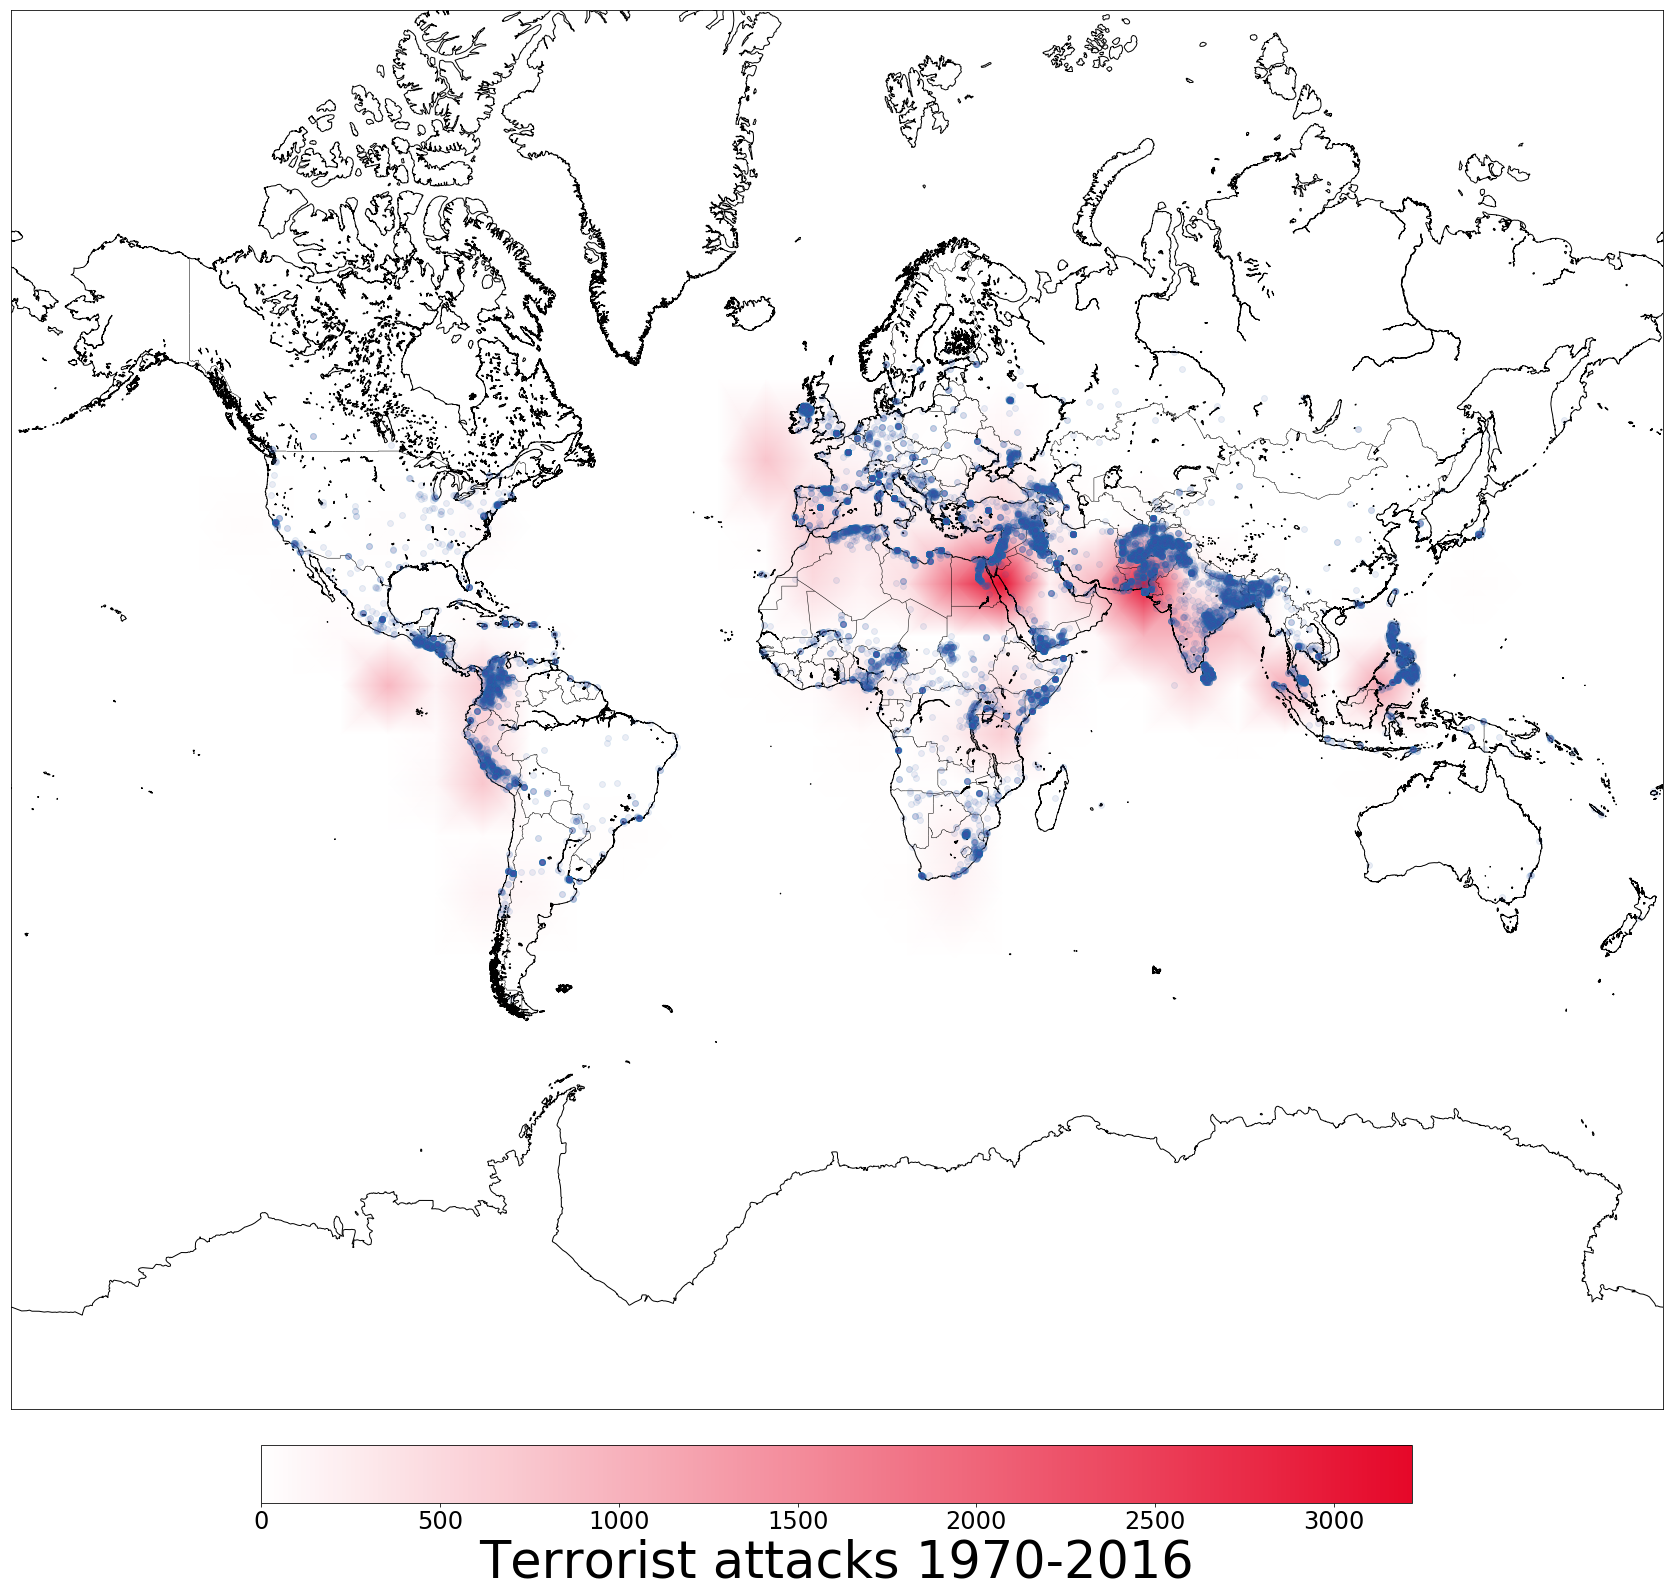

In [368]:
glt_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'state','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type'},inplace=True)
glt_df=glt_df[['Year','Month','Day','Country','Region','city','state','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type']]
glt_df['casualities']=glt_df['Killed']+glt_df['Wounded']


lat, lon = glt_df[glt_df.casualities==1].latitude.tolist(), glt_df[glt_df.casualities==1].longitude.tolist()
m = Basemap(projection='merc',llcrnrlat=-82,urcrnrlat=82,\
            llcrnrlon=-180,urcrnrlon=180, resolution='i')
m.drawcoastlines()
m.drawcountries()

lon_bin, lat_bin = np.linspace(-180, 180, 36), np.linspace(-90, 90, 18)
    

density, lat_edges, lon_edges = np.histogram2d(lat, lon, [lat_bin, lon_bin])
lon_bin2d, lat_bin2d = np.meshgrid(lon_bin, lat_bin)
xs, ys = m(lon_bin2d, lat_bin2d)

colours = {'red': ((0.0,  1.0,  1.0), (1.0,  0.9,  1.0)),
         'green': ((0.0,  1.0,  1.0), (1.0,  0.03, 0.0)),
         'blue': ((0.0,  1.0,  1.0), (1.0,  0.16, 0.0))}

cmap = LinearSegmentedColormap('custom_map', colours)
plt.register_cmap(cmap=cmap)

density = np.hstack((density,np.zeros((density.shape[0],1))))
density = np.vstack((density,np.zeros((density.shape[1]))))

plt.pcolormesh(xs, ys, density, cmap="custom_map", shading='gouraud')

cmbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cmbar.ax.tick_params(labelsize=24)
cmbar.set_label('Terrorist attacks 1970-2016',size=51)

x,y = m(lon, lat)
m.plot(x, y, 'o', markersize=6, zorder=6, markerfacecolor='#424FA4', alpha=0.1)
plt.gcf().set_size_inches(33,33)

plt.show()